0 [0, 0]
371.68316681634633 371.68316681634633
20 [1, 0]
368.34078496313623 368.34078496313623
40 [2, 0]
365.8807453462303 365.8807453462303
60 [3, 0]
365.06901459403485 365.06901459403485
80 [4, 0]
365.57775036938534 365.57775036938534
100 [5, 0]
367.2400082431707 367.2400082431707
120 [6, 0]
368.5054290600919 368.5054290600919
140 [7, 0]
366.2524922499517 366.2524922499517
160 [8, 0]
369.33399144316985 369.33399144316985
180 [9, 0]
369.0773545653942 369.0773545653942
200 [10, 0]
370.17529459214285 370.17529459214285
220 [11, 0]
370.5343338552087 370.5343338552087
240 [12, 0]
370.95530941014965 370.95530941014965
260 [13, 0]
371.2707922131294 371.2707922131294
280 [14, 0]
371.86033074003825 371.86033074003825
300 [15, 0]
372.11293592774825 372.11293592774825
320 [16, 0]
372.37699519746275 372.37699519746275
340 [17, 0]
372.83218483817166 372.83218483817166
360 [18, 0]
373.2100173320307 373.2100173320307
380 [19, 0]
373.2830479277543 373.2830479277543
400 [20, 0]
372.26211438898383 372

116 [5, 16]
381.8561802434025 381.8561802434025
136 [6, 16]
378.3078016937373 378.3078016937373
156 [7, 16]
378.98347773307495 378.98347773307495
176 [8, 16]
381.9850096534162 381.9850096534162
196 [9, 16]
385.00820505435627 385.00820505435627
216 [10, 16]
385.11624497533455 385.11624497533455
236 [11, 16]
0 0.0
256 [12, 16]
0 0.0
276 [13, 16]
0 0.0
296 [14, 16]
0 0.0
316 [15, 16]
0 0.0
336 [16, 16]
0 0.0
356 [17, 16]
0 0.0
376 [18, 16]
0 0.0
396 [19, 16]
227.42577264316222 227.42577264316222
416 [20, 16]
0 0.0
436 [21, 16]
0 0.0
456 [22, 16]
0 0.0
476 [23, 16]
0 0.0
17 [0, 17]
379.2566575935097 379.2566575935097
37 [1, 17]
379.53073061120165 379.53073061120165
57 [2, 17]
380.1713999558055 380.1713999558055
77 [3, 17]
380.0046731488498 380.0046731488498
97 [4, 17]
380.05279246287984 380.05279246287984
117 [5, 17]
379.51320155953914 379.51320155953914
137 [6, 17]
377.9995697488725 377.9995697488725
157 [7, 17]
380.47485414666266 380.47485414666266
177 [8, 17]
378.7693459152109 378.76934

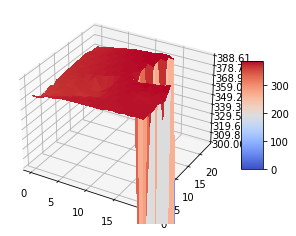

<Figure size 432x288 with 0 Axes>

f:\producto\python\python36\lib\site-packages\ipykernel_launcher.py:85: UserWarning: The following kwargs were not used by contour: 'offset'


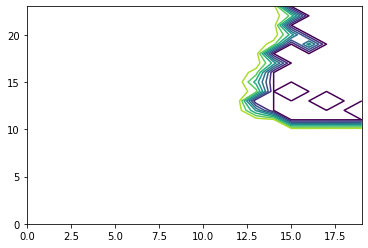

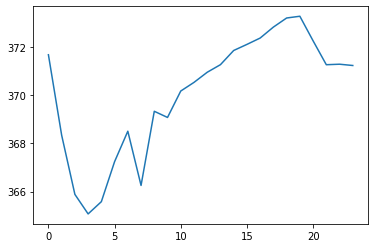

In [18]:
#para pintar una superficie
import pickle
import numpy as np 
import math

input = open('config.pickle', 'rb')
Q = pickle.load(input)
input.close()

# for key, value in Q.items():
#     print (key)
#     (s,a)=key
#     print(s,a)
#     print (Q[s,a])
a_space = np.array([-2,-1,0,1,2])

# matriz V
# s = t * N_Q + q
N_T = 24
N_Q = 20
N_A = 5

def s_to_obs(s):
    # s = t * N_Q + q
    q = s % N_Q
    t = round((s - q) / N_Q)
    print(s, [t,q])
    return [t,q]

V = np.zeros((N_T, N_Q))
for q in range(N_Q):
    for t in range(N_T):
        s = t * N_Q + q
        W = [Q[s,a] for a in a_space]
        obs = s_to_obs(s)
        V[obs[0], obs[1]] = np.max(W)
        print(np.max(W), V[obs[0], obs[1]])
     
print (V)
# pintar V 


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, N_Q)
Y = np.arange(0, N_T)
X, Y = np.meshgrid(X, Y)
Z = V

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(300, V.max())
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

plt.figure()
ax = fig.gca()
# Plot contour curves
cset = ax.contour(X, Y, Z, offset = 300, cmap=cm.coolwarm)

ax.clabel(cset, fontsize=9, inline=1)

plt.show()



plt.figure()
plt.contour(X, Y, Z, offset = -300)
plt.show()

plt.figure()
plt.plot(V[:,0])

(360.0, 390.0)

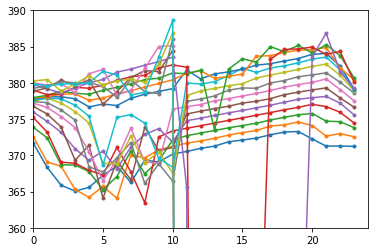

In [38]:
plt.figure()
for q in range(20):
    plt.plot(V[:,q],'.-')
plt.xlim([0,24])
plt.ylim([360,390])


In [21]:
def obs_to_s(obs):
    t = obs[0] % 24
    q = obs[1]
    s = t*N_Q + q
    return s

In [50]:
print(V[10:,0])
print(V[0:9,0])
print([V[10:,0], V[0:9,0]])

[370.17529459 370.53433386 370.95530941 371.27079221 371.86033074
 372.11293593 372.3769952  372.83218484 373.21001733 373.28304793
 372.26211439 371.26852718 371.28984091 371.23618169]
[371.68316682 368.34078496 365.88074535 365.06901459 365.57775037
 367.24000824 368.50542906 366.25249225 369.33399144]
[array([370.17529459, 370.53433386, 370.95530941, 371.27079221,
       371.86033074, 372.11293593, 372.3769952 , 372.83218484,
       373.21001733, 373.28304793, 372.26211439, 371.26852718,
       371.28984091, 371.23618169]), array([371.68316682, 368.34078496, 365.88074535, 365.06901459,
       365.57775037, 367.24000824, 368.50542906, 366.25249225,
       369.33399144])]


ValueError: setting an array element with a sequence.

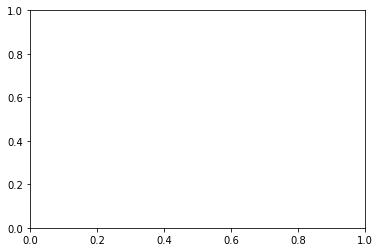

In [51]:
plt.figure()
plt.plot([V[10:,0], V[0:9,0]],'.-')

In [23]:
obs_to_s([21,0])

420

In [28]:
[Q[obs_to_s([21,0]),a] for a in a_space]

[364.4092395597893,
 368.04589758828337,
 371.2685271786219,
 370.400756713081,
 370.7572060749746]

In [29]:
[Q[obs_to_s([20,0]),a] for a in a_space]

[364.00606608698365,
 362.60648533131285,
 370.6039708503094,
 371.3077719791753,
 372.26211438898383]

In [30]:
a_space

array([-2, -1,  0,  1,  2])

In [31]:
[Q[obs_to_s([22,0]),a] for a in a_space]

[361.5228675142584,
 361.1157802649289,
 371.28984091105195,
 370.1272344100934,
 368.90581109102345]